## Load Connections

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

## Phase 2 : Data Understanding and EDA 

### Loading & Inspecting data

In [62]:
df = pd.read_csv(r'C:\Users\Satyam Mishra\Desktop\Phase 3\archive (2)\Clean_Dataset.csv')

In [63]:
df.shape

(300153, 12)

In [64]:
df.head(5)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [65]:
df.drop('Unnamed: 0',inplace=True,axis =1)

In [66]:
df.sample(2)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
280741,Vistara,UK-874,Hyderabad,Morning,one,Evening,Bangalore,Business,9.25,11,38099
149441,Vistara,UK-708,Kolkata,Night,one,Night,Chennai,Economy,23.83,17,11876


In [67]:
for col in df.columns:
    if col not in ('flight','duration','days_left','price'):
        print(col)
        print(df[col].value_counts())
        print('\n')

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64


source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64


departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64


stops
one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64


arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: arrival_time, dtype: int64


destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64


class
Economy     206666
Business   

In [68]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [69]:
df.shape

(300153, 11)

In [70]:
df['flight'].nunique()

1561

In [71]:
df.groupby(['airline','flight'])['price'].count()

airline  flight 
AirAsia  I5-1228     144
         I5-1229     408
         I5-1321      83
         I5-1426     139
         I5-1427       2
                    ... 
Vistara  UK-988     1381
         UK-993      911
         UK-994     1273
         UK-995     1024
         UK-996     1266
Name: price, Length: 1561, dtype: int64

In [72]:
len(df)

300153

In [73]:
df[df.duplicated()]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price


In [74]:
print(df[['airline']].nunique())
print(df[['flight']].nunique())
print(df[['airline', 'flight']].drop_duplicates().shape[0])
print(df[['airline', 'flight', 'source_city']].drop_duplicates().shape[0])
print(df[['airline', 'flight', 'source_city', 'destination_city']].shape[0])


airline    6
dtype: int64
flight    1561
dtype: int64
1561
1612
300153


In [75]:
df.sample(2)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
149012,Indigo,6E-725,Kolkata,Evening,one,Early_Morning,Chennai,Economy,10.0,13,7954
25530,Indigo,6E-2083,Delhi,Early_Morning,one,Morning,Kolkata,Economy,5.5,32,4002


In [76]:
df[['airline', 'flight', 'source_city','departure_time' ,'stops','arrival_time','destination_city','class','duration','days_left']].drop_duplicates().shape


(298566, 10)

In [77]:
# rows that are duplicates according to the subset (keep=False shows all rows of each duplicate group)
cols = ['airline','flight','source_city','departure_time','stops','arrival_time','destination_city','class','duration','days_left']

dups = df[df.duplicated(subset=cols, keep=False)].sort_values(cols)
dups.head(40)   # see first few duplicate groups


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
137871,AirAsia,I5-510,Kolkata,Early_Morning,one,Afternoon,Bangalore,Economy,10.83,19,3862
137883,AirAsia,I5-510,Kolkata,Early_Morning,one,Afternoon,Bangalore,Economy,10.83,19,4257
138933,AirAsia,I5-510,Kolkata,Early_Morning,one,Afternoon,Bangalore,Economy,10.83,26,3862
138948,AirAsia,I5-510,Kolkata,Early_Morning,one,Afternoon,Bangalore,Economy,10.83,26,4257
139981,AirAsia,I5-510,Kolkata,Early_Morning,one,Afternoon,Bangalore,Economy,10.83,33,3565
140007,AirAsia,I5-510,Kolkata,Early_Morning,one,Afternoon,Bangalore,Economy,10.83,33,3862
141018,AirAsia,I5-510,Kolkata,Early_Morning,one,Afternoon,Bangalore,Economy,10.83,40,3565
141048,AirAsia,I5-510,Kolkata,Early_Morning,one,Afternoon,Bangalore,Economy,10.83,40,3862
142062,AirAsia,I5-510,Kolkata,Early_Morning,one,Afternoon,Bangalore,Economy,10.83,47,3565
142102,AirAsia,I5-510,Kolkata,Early_Morning,one,Afternoon,Bangalore,Economy,10.83,47,3862


In [78]:
df.dtypes

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [79]:
df = df.drop_duplicates(subset=['airline', 'flight', 'source_city','departure_time' ,'stops','arrival_time','destination_city','class','duration','days_left'])

In [80]:
df.shape

(298566, 11)

### Univariate analysis

<Axes: xlabel='airline', ylabel='count'>

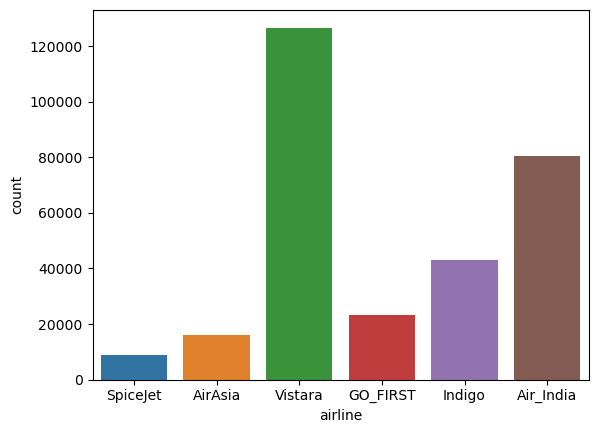

In [81]:
sns.countplot(x=df['airline'])

<Axes: xlabel='source_city', ylabel='count'>

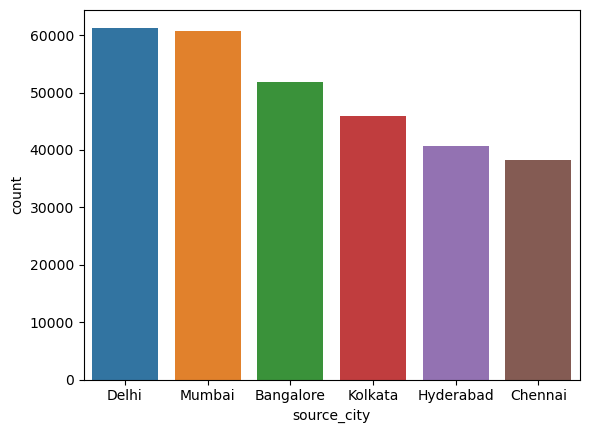

In [82]:
sns.countplot(x=df['source_city'])

<Axes: xlabel='destination_city', ylabel='count'>

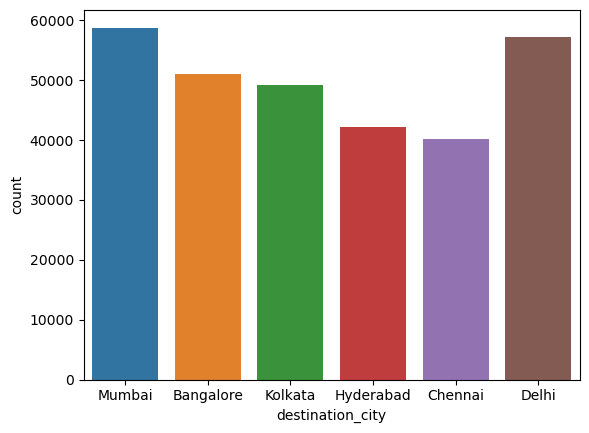

In [83]:
sns.countplot(x=df['destination_city'])

<Axes: xlabel='stops', ylabel='count'>

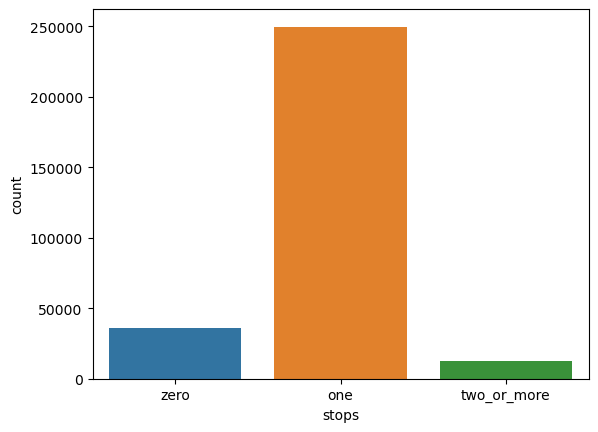

In [84]:
sns.countplot(x=df['stops'])

In [85]:
for col in df.columns:
    if col  in ('duration','days_left','price'):
        print(col)
        print(df[col].describe())
        print('\n')

duration
count    298566.000000
mean         12.192234
std           7.175410
min           0.830000
25%           6.750000
50%          11.250000
75%          16.080000
max          49.830000
Name: duration, dtype: float64


days_left
count    298566.000000
mean         26.005208
std          13.562179
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64


price
count    298566.000000
mean      20870.837008
std       22664.216917
min        1105.000000
25%        4768.250000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64




In [86]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

<Axes: >

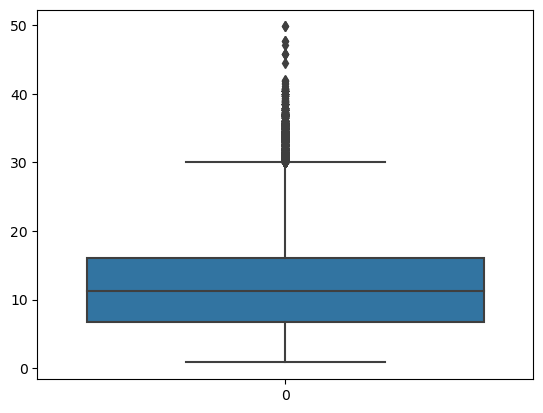

In [87]:
sns.boxplot(df['duration'])

<Axes: >

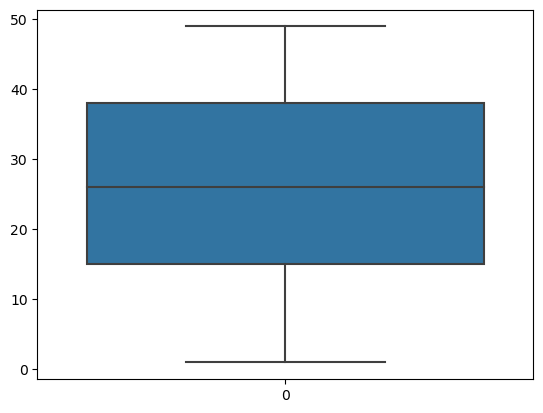

In [88]:
sns.boxplot(df['days_left'])

<Axes: >

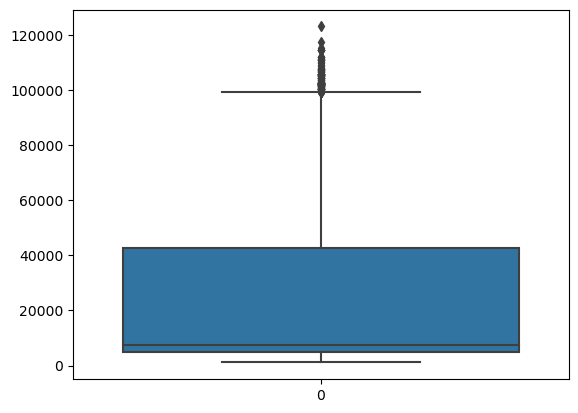

In [89]:
sns.boxplot(df['price'])

In [90]:
df[df['class']=='Business']['price'].describe()

count     93166.00000
mean      52449.97307
std       12884.98080
min       12000.00000
25%       45185.00000
50%       53164.00000
75%       60365.00000
max      123071.00000
Name: price, dtype: float64

In [91]:
df[df['price']>=100000].sample(2)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
230493,Vistara,UK-910,Mumbai,Evening,one,Morning,Bangalore,Business,15.08,7,102404
216440,Vistara,UK-811,Delhi,Early_Morning,two_or_more,Evening,Kolkata,Business,10.92,10,102114


In [92]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3-Q1
LF = Q1-1.5*IQR
HF = Q3+1.5*IQR
print(Q1,Q3,IQR)
print(LF,HF)

4768.25 42521.0 37752.75
-51860.875 99150.125


In [93]:
df[(df['class']=='Business') & (df['price']>99150)].shape

(117, 11)

In [94]:
df.shape

(298566, 11)

In [95]:
117/298566

0.00039187315367456444

In [96]:
df = df[df['price']<=100000]

In [97]:
df.shape

(298463, 11)

In [98]:
298566-298463

103

In [99]:
df['price'].describe()

count    298463.000000
mean      20841.737334
std       22613.766933
min        1105.000000
25%        4768.000000
50%        7425.000000
75%       42521.000000
max       99680.000000
Name: price, dtype: float64

### Bivariate Analysis

In [101]:
df.sample(1)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
55854,Indigo,6E-5396,Mumbai,Evening,one,Night,Bangalore,Economy,6.25,19,4391


In [102]:
df.shape

(298463, 11)

<Axes: xlabel='airline', ylabel='price'>

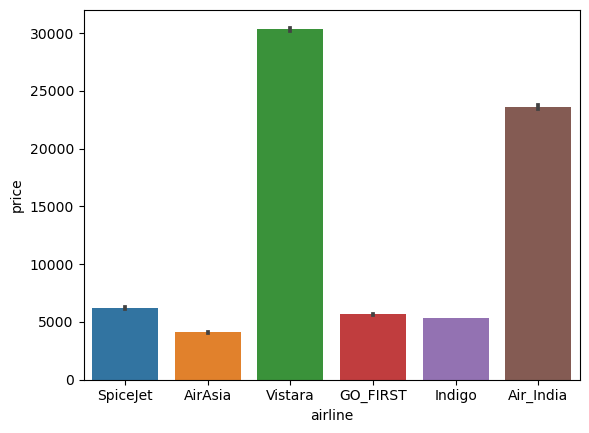

In [103]:
sns.barplot(x=df['airline'],y=df['price'])

<Axes: xlabel='stops', ylabel='price'>

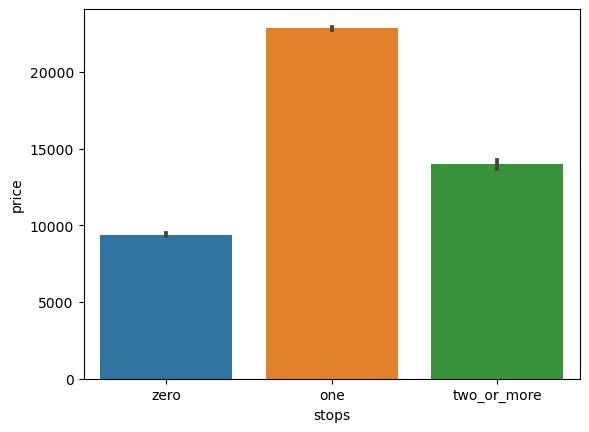

In [104]:
sns.barplot(x=df['stops'],y=df['price'])

<Axes: xlabel='departure_time', ylabel='price'>

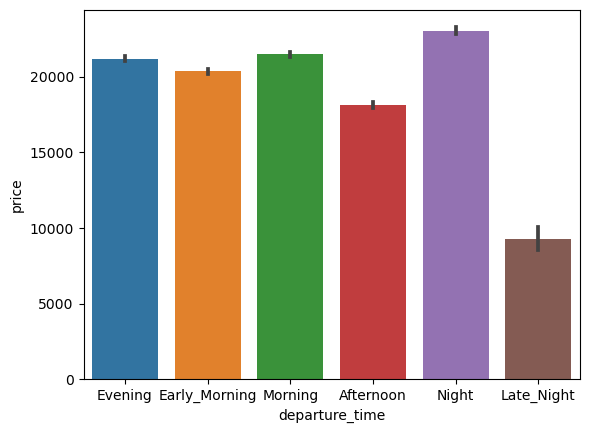

In [105]:
sns.barplot(x=df['departure_time'],y=df['price'])

In [106]:
df.sample(1)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
275189,Vistara,UK-874,Hyderabad,Morning,one,Evening,Delhi,Business,8.42,10,59827


### Encoding

OHE :- airline,source_city, destination_city (no natural order or hierarchy between these cols) <br>
Ordinal encoding :- departure_time,arrival_time,stops (there is a natural order) <br>
binary encoding :- class (eco/bus : 0/1)

In [107]:
df['class'].value_counts()

Economy     205400
Business     93063
Name: class, dtype: int64

In [108]:
df['class'] = df['class'].map({'Economy':0,'Business':1})

In [109]:
df['class'].value_counts()

0    205400
1     93063
Name: class, dtype: int64

In [110]:
df['stops'].value_counts()

one            249618
zero            36004
two_or_more     12841
Name: stops, dtype: int64

In [111]:
df['stops'] = df['stops'].map({'one':1,'zero':0,'two_or_more':2})

In [112]:
df['stops'].value_counts()

1    249618
0     36004
2     12841
Name: stops, dtype: int64

In [113]:
df['departure_time'].value_counts()

Morning          70431
Early_Morning    66412
Evening          64951
Night            47884
Afternoon        47479
Late_Night        1306
Name: departure_time, dtype: int64

In [114]:
df['arrival_time'].value_counts()

Night            90631
Evening          77886
Morning          62561
Afternoon        38036
Early_Morning    15349
Late_Night       14000
Name: arrival_time, dtype: int64

In [115]:
time_map = {'Early_Morning':1,'Morning':2,'Afternoon':3,'Evening':4,'Night':5,'Late_Night':6}

df['departure_time'] = df['departure_time'].map(time_map)
df['arrival_time'] = df['arrival_time'].map(time_map)

In [116]:
df['departure_time'].value_counts()

2    70431
1    66412
4    64951
5    47884
3    47479
6     1306
Name: departure_time, dtype: int64

In [117]:
df['arrival_time'].value_counts()

5    90631
4    77886
2    62561
3    38036
1    15349
6    14000
Name: arrival_time, dtype: int64

In [118]:
df=pd.get_dummies(df,columns=['airline','source_city', 'destination_city'])

In [119]:
df.sample(2)

,flight,departure_time,stops,arrival_time,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
144312,6E-345,2,1,4,0,7.17,18,5699,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
166998,I5-510,1,1,4,0,9.67,17,2738,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [120]:
df.drop('flight',axis =1,inplace=True)

In [121]:
df.sample(1)

,departure_time,stops,arrival_time,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
267283,3,1,2,1,20.42,49,45776,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [122]:
df.corr()

,departure_time,stops,arrival_time,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
departure_time,1.000000,-0.067396,-0.079453,0.030755,0.134342,0.000184,0.021508,0.029398,-0.001919,-0.018129,-0.023093,-0.009646,0.017869,-0.028565,-0.022839,0.010036,0.018444,0.033018,-0.009508,-0.000084,0.006382,-0.008280,0.012947,0.016121,-0.023582
stops,-0.067396,1.000000,0.044927,0.002904,0.468752,-0.008130,0.121136,0.039602,0.061264,-0.032269,-0.171183,-0.086931,0.096240,0.005088,0.020024,-0.051056,0.012101,0.045202,-0.020944,0.016097,0.060875,-0.103295,0.026285,0.062095,-0.046170
arrival_time,-0.079453,0.044927,1.000000,-0.023011,-0.123958,-0.001192,-0.002702,0.035742,-0.052523,0.024351,0.047795,-0.019529,-0.009601,-0.012174,0.023849,-0.052836,0.015084,0.012819,0.020364,0.033954,-0.051216,0.085253,-0.037326,-0.058761,0.014950
class,0.030755,0.002904,-0.023011,1.000000,0.142203,-0.013035,0.939104,-0.160688,0.127332,-0.195260,-0.276609,-0.118764,0.302709,0.005000,0.011536,-0.014643,0.002162,-0.019474,0.016009,0.005523,0.012430,-0.021669,0.008127,-0.013057,0.010619
duration,0.134342,0.468752,-0.123958,0.142203,1.000000,-0.038093,0.207790,-0.108133,0.275965,-0.138883,-0.366293,0.009550,0.134110,-0.012853,0.031956,-0.048322,0.003795,0.060247,-0.023097,-0.009810,0.060590,-0.114817,0.066717,0.061848,-0.045200
days_left,0.000184,-0.008130,-0.001192,-0.013035,-0.038093,1.000000,-0.091333,0.030339,-0.022942,0.030423,0.007668,-0.024573,-0.006686,-0.001720,0.002575,-0.001132,0.010475,0.000635,-0.008870,0.002032,0.000288,0.006464,-0.000597,-0.004106,-0.004215
price,0.021508,0.121136,-0.002702,0.939104,0.207790,-0.091333,1.000000,-0.176830,0.073656,-0.194883,-0.281986,-0.114402,0.360382,0.013354,0.019207,-0.043181,-0.014506,0.014455,0.014237,0.014660,0.018660,-0.052665,-0.009071,0.020776,0.010816
airline_AirAsia,0.029398,0.039602,0.035742,-0.160688,-0.108133,0.030339,-0.176830,1.000000,-0.144993,-0.069250,-0.098101,-0.042120,-0.204950,0.022244,-0.024879,0.039766,-0.014951,0.014551,-0.040488,0.026981,-0.028222,0.050799,-0.030430,0.005494,-0.030063
airline_Air_India,-0.001919,0.061264,-0.052523,0.127332,0.275965,-0.022942,0.073656,-0.144993,1.000000,-0.176188,-0.249591,-0.107164,-0.521441,-0.039908,-0.010395,0.009926,0.002472,-0.001611,0.035559,-0.036180,0.005202,-0.017008,0.012117,-0.005643,0.041251
airline_GO_FIRST,-0.018129,-0.032269,0.024351,-0.195260,-0.138883,0.030423,-0.194883,-0.069250,-0.176188,1.000000,-0.119207,-0.051183,-0.249045,0.015634,-0.062758,0.029985,-0.023669,0.001214,0.026331,0.014373,-0.059776,0.033744,-0.025108,-0.000784,0.027020


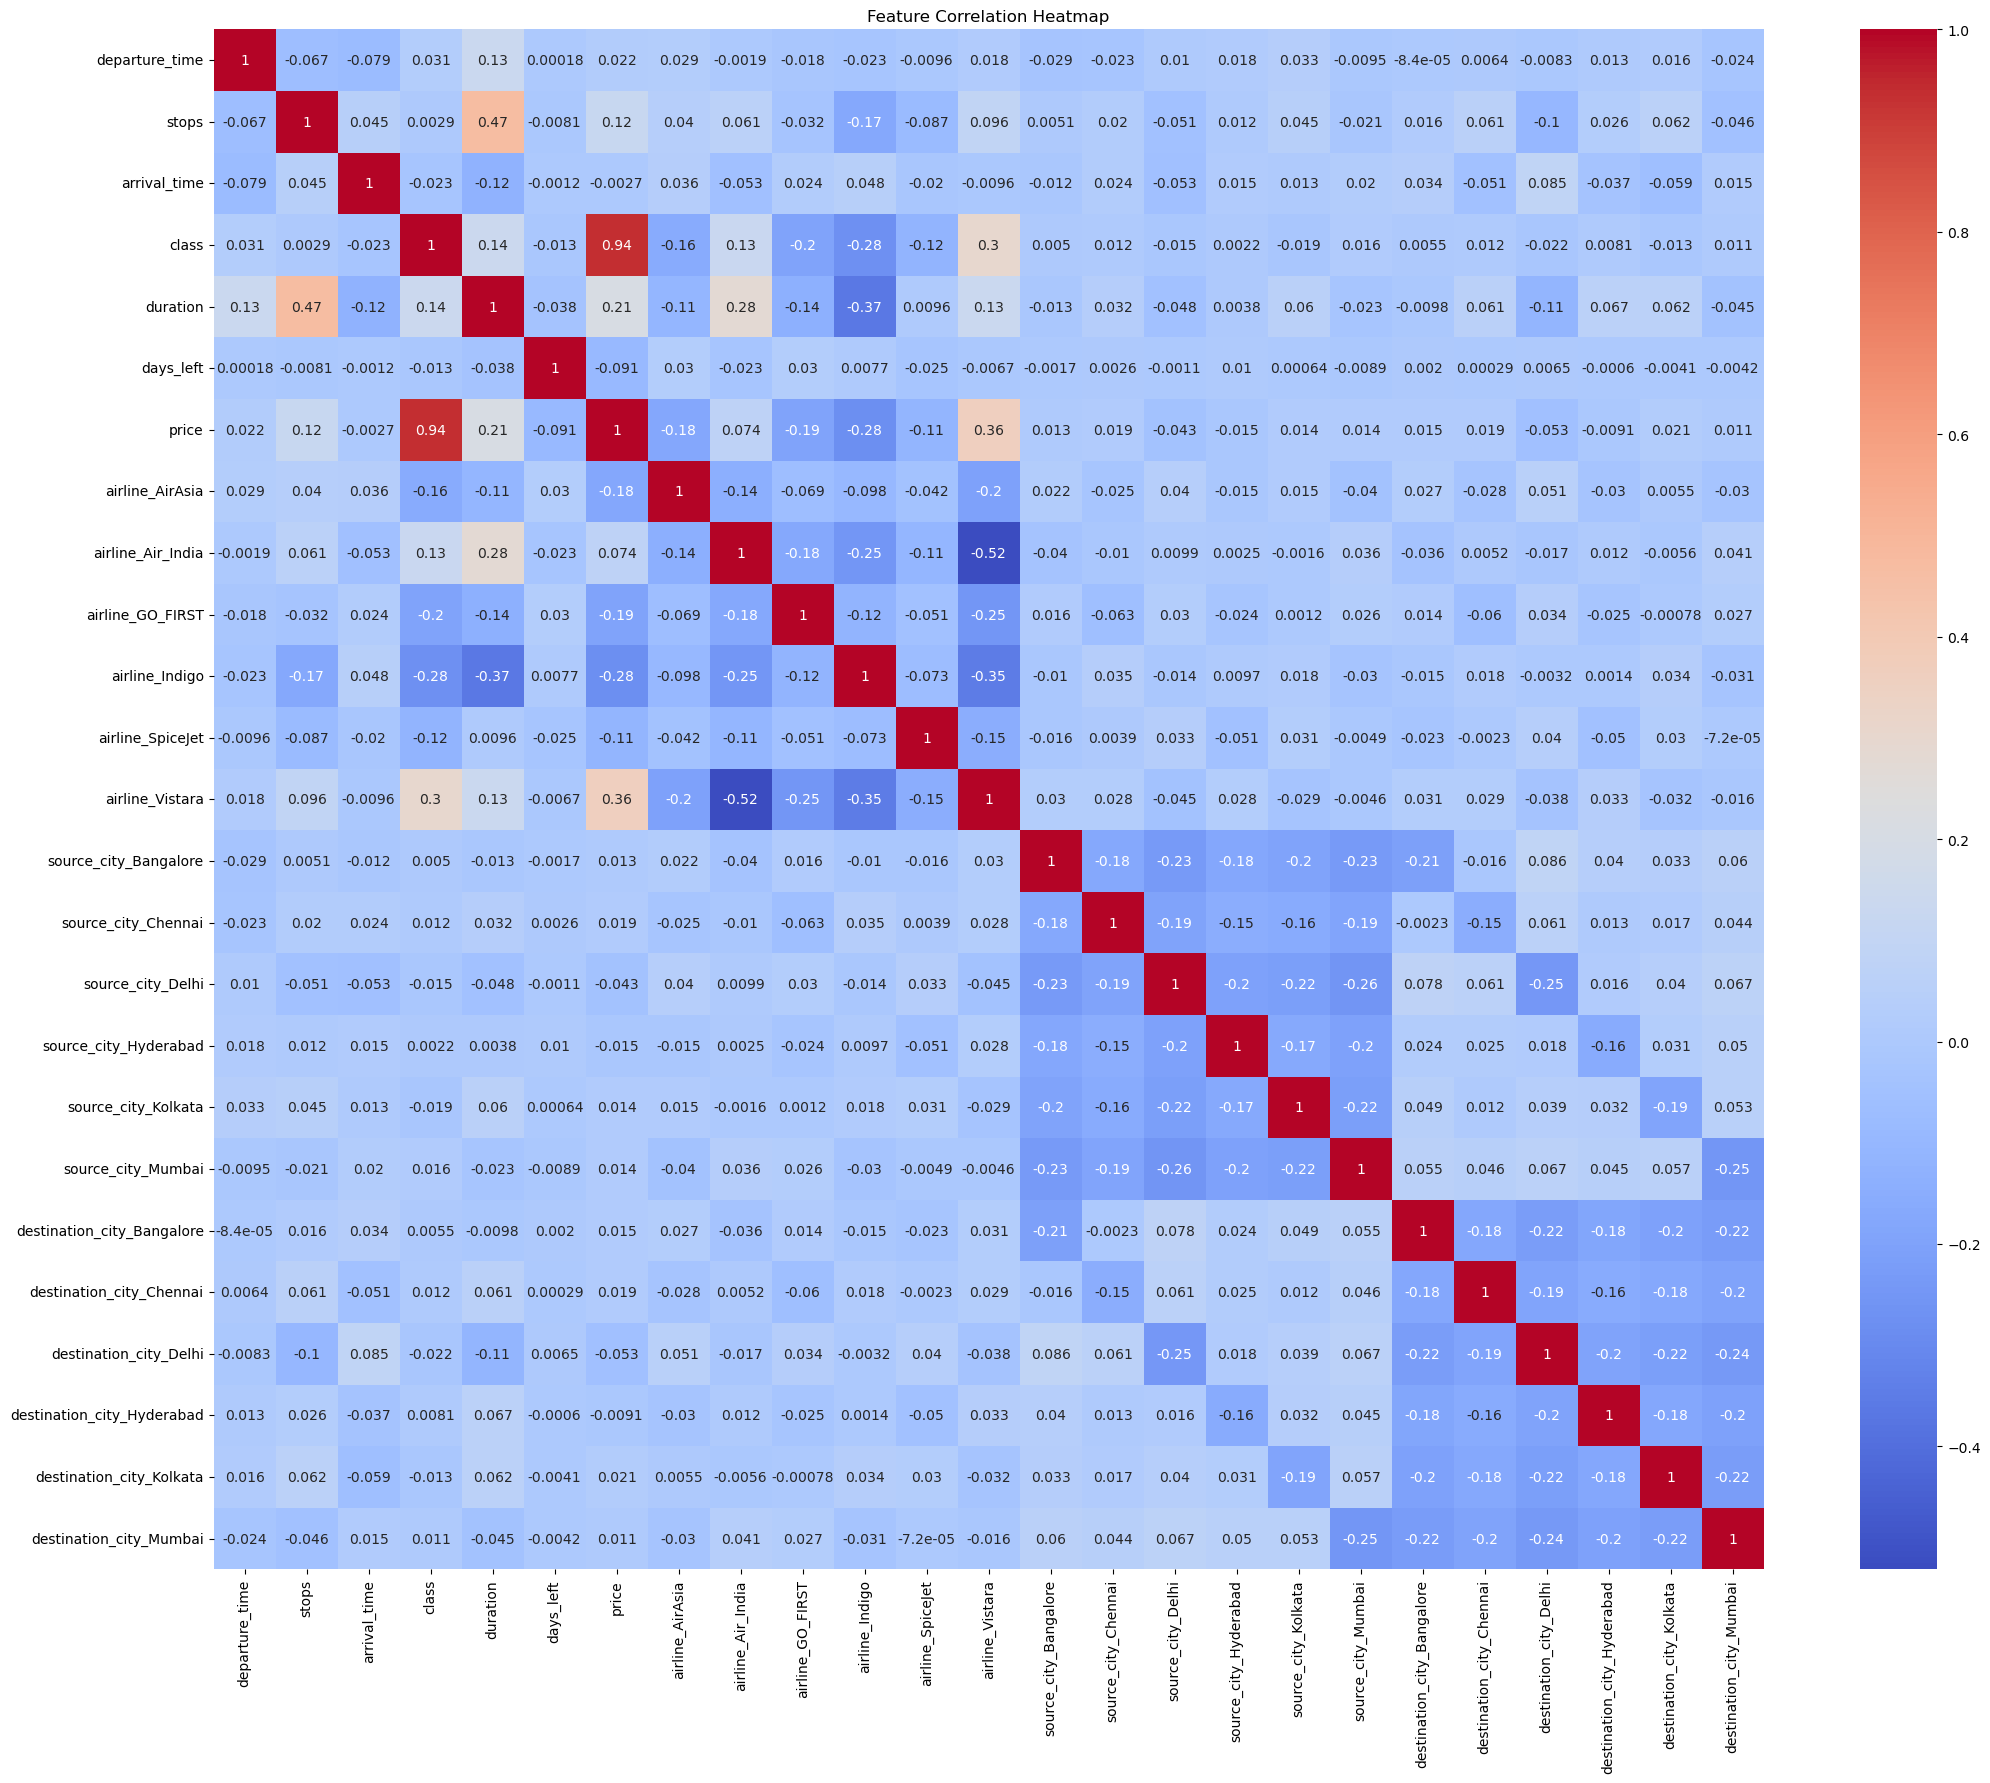

In [123]:
corr = df.corr()

plt.figure(figsize=(25,20))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

In [124]:
corr['price'].sort_values(ascending=True)

airline_Indigo               -0.281986
airline_GO_FIRST             -0.194883
airline_AirAsia              -0.176830
airline_SpiceJet             -0.114402
days_left                    -0.091333
destination_city_Delhi       -0.052665
source_city_Delhi            -0.043181
source_city_Hyderabad        -0.014506
destination_city_Hyderabad   -0.009071
arrival_time                 -0.002702
destination_city_Mumbai       0.010816
source_city_Bangalore         0.013354
source_city_Mumbai            0.014237
source_city_Kolkata           0.014455
destination_city_Bangalore    0.014660
destination_city_Chennai      0.018660
source_city_Chennai           0.019207
destination_city_Kolkata      0.020776
departure_time                0.021508
airline_Air_India             0.073656
stops                         0.121136
duration                      0.207790
airline_Vistara               0.360382
class                         0.939104
price                         1.000000
Name: price, dtype: float

class, airline, duration, stops, and days_left are the most meaningful predictors.

In [125]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.drop(columns=['price'])

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data.sort_values(by="VIF", ascending=False)


C:\Users\Satyam Mishra\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
12,source_city_Bangalore,inf
13,source_city_Chennai,inf
22,destination_city_Kolkata,inf
21,destination_city_Hyderabad,inf
20,destination_city_Delhi,inf
19,destination_city_Chennai,inf
18,destination_city_Bangalore,inf
17,source_city_Mumbai,inf
16,source_city_Kolkata,inf
15,source_city_Hyderabad,inf


In [126]:
df['duration'].describe()

count    298463.000000
mean         12.191369
std           7.175794
min           0.830000
25%           6.750000
50%          11.250000
75%          16.080000
max          49.830000
Name: duration, dtype: float64

In [127]:
df['days_left'].describe()

count    298463.000000
mean         26.011278
std          13.559610
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64

### Feature Engineering

In [128]:
df['is_long_haul'] = (df['duration'] > 5).astype(int)
df['is_last_minute'] = (df['days_left'] < 3).astype(int)

In [129]:
df['is_long_haul'].value_counts()

1    252950
0     45513
Name: is_long_haul, dtype: int64

In [130]:
df['is_last_minute'].value_counts()

0    292567
1      5896
Name: is_last_minute, dtype: int64

In [131]:
df.sample(1)

,departure_time,stops,arrival_time,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,is_long_haul,is_last_minute
290381,2,1,5,1,9.33,2,80129,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,1


### Scaling

Only days_left and duration need scaling because they are continuous numeric and unbounded, while all others are already standardized (0/1) or categorical.

Min-Max Scaling → best for non-normal, bounded, positive features (like time and days). <br>

Z-score Scaling → best for normally distributed, unbounded data (not our case).

The data was skewed and bounded, so Min-Max scaling was the best choice because Z-score assumes a normal distribution

In [132]:
cols_to_scale = ['duration','days_left']

In [133]:
df['duration'].dtype

dtype('float64')

In [134]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [135]:
for i in cols_to_scale:
    print(df[i].describe())

count    298463.000000
mean          0.231865
std           0.146445
min           0.000000
25%           0.120816
50%           0.212653
75%           0.311224
max           1.000000
Name: duration, dtype: float64
count    298463.000000
mean          0.521068
std           0.282492
min           0.000000
25%           0.291667
50%           0.520833
75%           0.770833
max           1.000000
Name: days_left, dtype: float64


In [136]:
df.sample(2)

,departure_time,stops,arrival_time,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,is_long_haul,is_last_minute
203478,3,1,4,0,0.085102,0.229167,6885,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
16454,1,1,3,0,0.117347,0.666667,3127,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


### Phase 5:  Model Building

## Model Building Plan

### **1️⃣ Baseline Model**
- **Linear Regression**
  - *Purpose:* Establish a simple benchmark to understand the basic linear relationship between features and price.

---

### **2️⃣ Regularized Linear Models**
- **Ridge Regression**
  - *Purpose:* Handles multicollinearity and prevents overfitting by applying L2 regularization.
- **Lasso Regression**
  - *Purpose:* Performs feature selection by shrinking less important coefficients to zero using L1 regularization.
- **Elastic Net Regression**
  - *Purpose:* Combines L1 and L2 penalties to balance feature selection and coefficient stability.

---

### **3️⃣ Non-Linear / Distance-Based Models ❌ (best for models where rows<100k)**
- **K-Nearest Neighbors (KNN) Regressor**
  - *Purpose:* Captures local patterns in data using distance metrics; good for non-linear relationships.
- **Support Vector Regressor (SVR)**
  - *Purpose:* Fits complex, non-linear relationships using kernel functions and maximizes margin around predictions.

---

### **4️⃣ Tree-Based Models**
- **Decision Tree Regressor**
  - *Purpose:* Simple non-linear model that splits data based on feature thresholds for interpretability.
- **Random Forest Regressor**
  - *Purpose:* Reduces variance and improves generalization by averaging predictions of multiple trees.
- **Gradient Boosting Regressor**
  - *Purpose:* Builds trees sequentially to correct errors of previous ones, improving accuracy.
- **XGBoost / LightGBM**
  - *Purpose:* Optimized gradient boosting algorithms for faster computation and superior performance on tabular data.

---

### **5️⃣ Advanced Ensemble Techniques**
- **Stacking Regressor**
  - *Purpose:* Combines multiple model predictions (e.g., Linear, Random Forest, XGBoost) to leverage their individual strengths for better overall performance.

---

### **Evaluation Metrics**
- **Root Mean Squared Error (RMSE):**
  - Measures prediction accuracy; penalizes larger errors.
- **R-Squared (R²):**
  - Indicates how well the model explains variance in the target variable.

---

### **Hyperparameter Optimization**
- Use **GridSearchCV / RandomizedSearchCV** with **cross-validation (cv=5)** for each model to find the optimal parameter combination.


In [137]:
from sklearn.model_selection import train_test_split

In [138]:
X = df.drop(columns=['price'])
y = df['price']

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Linear Regression

In [140]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [141]:
param_grid = {
    'fit_intercept':[True,False],
    'positive':[False,True]
}

In [142]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=lin_reg,param_grid=param_grid,scoring='neg_root_mean_squared_error',cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'positive': [False, True]},
             scoring='neg_root_mean_squared_error')

In [143]:
grid_search.best_params_

{'fit_intercept': True, 'positive': False}

In [144]:
### Evaluation
best_lin_reg = grid_search.best_estimator_
y_pred = best_lin_reg.predict(X_test)

from sklearn.metrics import r2_score,root_mean_squared_error

rmse = root_mean_squared_error(y_test,y_pred)
rmse_training = root_mean_squared_error(y_train,best_lin_reg.predict(X_train))
r2 = r2_score(y_test,y_pred)

print("RMSE:", rmse)
print("RMSE training:", rmse_training)
print("R²:", r2)

RMSE: 6609.684474161636
RMSE training: 6626.431539861796
R²: 0.9148227478709184


In [149]:
## L1 lasso regression
from sklearn.linear_model import Lasso
lasso = Lasso()

param_grid = {
    'alpha': [0.1, 1, 10],        # 3 values instead of 4-8
    'fit_intercept': [True],      # keep only the sensible default
    'max_iter': [5000],           # one value
    'tol': [1e-3]                 # one value
}

In [150]:
grid_search = GridSearchCV(estimator=lasso,param_grid=param_grid,cv=5,scoring='neg_root_mean_squared_error',n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

print(grid_search.best_params_)

best_lasso = grid_search.best_estimator_

y_pred = best_lasso.predict(X_test)

from sklearn.metrics import r2_score,root_mean_squared_error

rmse = root_mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print("RMSE:", rmse)
print("R²:", r2)


Fitting 5 folds for each of 3 candidates, totalling 15 fits
{'alpha': 0.1, 'fit_intercept': True, 'max_iter': 5000, 'tol': 0.001}
RMSE: 6609.6856080640755
R²: 0.9148227186463155


In [153]:
from sklearn.linear_model import Ridge

ridge = Ridge()

param_grid = {
    'alpha': [0.1, 1, 10, 100],         # practical range
    'fit_intercept': [True],
    'max_iter': [5000],
    'tol': [1e-3],
    'solver': ['auto', 'saga', 'lbfgs'] # 'saga' handles large sparse, 'lbfgs' precise
}

gs = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    cv=3,  # smaller folds for speed
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

gs.fit(X_train, y_train)

print("Best params:", gs.best_params_)

best_ridge = gs.best_estimator_
y_pred = best_ridge.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)


Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\Users\Satyam Mishra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
12 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Satyam Mishra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Satyam Mishra\anaconda3\lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Satyam Mishra\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 1175, in fit
    return super().fit(X, y, sample

Best params: {'alpha': 1, 'fit_intercept': True, 'max_iter': 5000, 'solver': 'saga', 'tol': 0.001}
RMSE: 6609.690493542608
R²: 0.9148225927305131


In [154]:
from sklearn.linear_model import ElasticNet

# instance (important)
en = ElasticNet()

# compact grid for speed
param_grid = {
    'alpha': [0.01, 0.1, 1, 10],        # realistic range
    'l1_ratio': [0.2, 0.5, 0.8],        # mix from mostly L2 to mostly L1
    'fit_intercept': [True],
    'max_iter': [5000],                 # increase if ConvergenceWarning appears
    'tol': [1e-3]
}

gs = GridSearchCV(
    estimator=en,
    param_grid=param_grid,
    cv=3,                                # fast for practice
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

gs.fit(X_train, y_train)

print("Best params:", gs.best_params_)
best_en = gs.best_estimator_
y_pred = best_en.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("R²:", r2)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best params: {'alpha': 0.01, 'fit_intercept': True, 'l1_ratio': 0.8, 'max_iter': 5000, 'tol': 0.001}
RMSE: 6614.76340087205
R²: 0.914691796013076


ElasticNet introduced a small bias, slightly increasing RMSE, but improved R², indicating a more generalizable model.
This is expected because ElasticNet blends L1 and L2 regularization, which balances feature sparsity and coefficient stability leading to better variance explanation with slightly higher bias.

### Nonlinear/Distance based models

KNN

In [161]:
# K-Nearest Neighbors Regression (fast GridSearch)
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

# Small, practical grid for speed + learning
param_grid = {
    'n_neighbors': [2, 5, 7,],   # number of neighbors to average over (odd helps avoid ties)
#     'weights': ['uniform', 'distance'],  # 'uniform' = equal vote, 'distance' = closer points weigh more
    'p': [1, 2],                   # p=1 -> Manhattan distance, p=2 -> Euclidean distance
    'metric': ['minkowski']        # distance function (minkowski with p selects above)
}

# Short explanation (one-line each):
# n_neighbors: how many nearby points the model looks at to predict y.
# weights: whether to weight neighbors equally or by inverse distance.
# p: when metric='minkowski', p=1 is Manhattan, p=2 is Euclidean.
# metric: distance function (minkowski is flexible and common).


In [162]:
gs_knn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=3,                        # quick CV for practice
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

gs_knn.fit(X_train, y_train)

print("Best params:", gs_knn.best_params_)

best_knn = gs_knn.best_estimator_
y_pred = best_knn.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)


Fitting 3 folds for each of 6 candidates, totalling 18 fits


KeyboardInterrupt: 

KNN is computationally expensive (O(n) per prediction) and scales poorly beyond ~100K samples, especially with many features. For 298k rows, tree-based or boosting models are far more efficient and accurate.

SVR scales quadratically with dataset size (O(n²)), so it’s not suitable for large datasets like 298k rows. Tree-based ensemble models (Random Forest, Gradient Boosting, XGBoost) are far more efficient and accurate for large tabular data

### Tree Based models

#### Decision Trees

In [165]:
# Decision Tree Regressor (fast GridSearch for practice)
from sklearn.tree import DecisionTreeRegressor

# instantiate (set random_state for reproducibility)
dt = DecisionTreeRegressor(random_state=42)

# compact, meaningful hyperparameter grid for speed
param_grid = {
    'criterion': ['squared_error'],   # loss function: 'squared_error' = MSE
    'max_depth': [6, 10, 15],         # max tree depth (controls complexity)
    'min_samples_split': [2, 10, 50], # min samples to split a node (prevents tiny splits)
    'min_samples_leaf': [1, 5, 20],   # min samples in a leaf (smooths predictions)
    'max_features': [None, 'sqrt']    # how many features to consider at split (None=all, 'sqrt'=subset)
}

# tiny CV (fast for practice)
gs_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=3,                          # quick CV
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

gs_dt.fit(X_train, y_train)       # run the search

print("Best params:", gs_dt.best_params_)

best_dt = gs_dt.best_estimator_
y_pred = best_dt.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best params: {'criterion': 'squared_error', 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
RMSE: 3632.2038742537243
R²: 0.9742781261602069


Decision Tree captured the non-linear relationships and feature interactions that linear models couldn’t, resulting in a significant reduction in RMSE (≈40%) and an R² improvement from 0.91 to 0.97.

#### Random Forest

In [167]:
# Random Forest Regressor (GridSearchCV)
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=12,
    min_samples_leaf=4,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("R²:", r2)



RMSE: 4525.86880349177
R²: 0.9600638596475548


The single Decision Tree achieved higher R² because it overfits the training data more aggressively, capturing fine-grained noise.
The Random Forest, being an ensemble of shallower randomized trees, smooths these predictions, reducing variance but slightly increasing bias which led to a small RMSE rise and lower R².
However, the Random Forest model will typically generalize better on unseen data.

#### Gradient Boosting algorithm (GBM)

In [172]:
# Gradient Boosting Regressor (GBR)
from sklearn.ensemble import GradientBoostingRegressor

# Single-run Gradient Boosting Regressor (one set of hyperparameters)
from sklearn.ensemble import GradientBoostingRegressor

# gbr = GradientBoostingRegressor(
#     n_estimators=100,        # number of boosting stages (trees)
#     learning_rate=0.05,      # step size to shrink contribution of each tree
#     max_depth=3,             # maximum depth of each individual regression tree
#     min_samples_split=10,    # minimum samples required to split an internal node
#     min_samples_leaf=5,      # minimum samples required to be at a leaf node
#     subsample=0.8,           # fraction of samples used for each tree (stochastic boosting)
#     random_state=42
# )

gbr = GradientBoostingRegressor(
    n_estimators=300,        # increase from 100 → 300
    learning_rate=0.05,      # keep same
    max_depth=3,
    min_samples_split=10,
    min_samples_leaf=5,
    subsample=0.8,
    random_state=42
)

# Train
gbr.fit(X_train, y_train)

# Predict
y_pred = gbr.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("R²:", r2)



RMSE: 4766.254321624857
R²: 0.9557088870643053


 Increasing n_estimators from 100→300 reduced bias, improving RMSE (↓) and R² (↑).
 Boosting learns sequentially, so more trees allow the model to capture finer residual patterns.


#### XgBoost

##### Sample based hyperparameter optimization

In [173]:
# ---------- Tune XGBoost on a 10% sample, then retrain best on full training set ----------
from xgboost import XGBRegressor

# 1) take a 10% random sample of the training data for fast tuning
X_sample = X_train.sample(frac=0.10, random_state=42)
y_sample = y_train.loc[X_sample.index]

# 2) compact, meaningful parameter grid (keep it small for speed)
param_grid = {
    'n_estimators': [100, 300],        # number of boosting rounds (trees)
    'learning_rate': [0.05, 0.1],      # how much each tree contributes (shrinkage)
    'max_depth': [4, 6],               # maximum depth of each tree (controls complexity)
    'subsample': [0.8, 1.0],           # fraction of rows sampled per tree (stochastic bagging)
    'colsample_bytree': [0.8, 1.0],    # fraction of features sampled per tree
    'reg_alpha': [0, 0.1],             # L1 regularization term on weights (sparsity)
    'reg_lambda': [1, 2]               # L2 regularization term on weights (stability)
}

# Short, clear explanations for the grid above:
# n_estimators: more trees -> potentially better fit but slower; early stopping can reduce needed trees.
# learning_rate: lower values mean each tree learns less; typically requires more trees but gives smoother learning.
# max_depth: higher values allow modeling more complex interactions but increase overfitting risk.
# subsample: using <1.0 makes training stochastic and often improves generalization.
# colsample_bytree: sampling features per tree reduces correlation between trees and overfitting.
# reg_alpha (L1) and reg_lambda (L2): regularization terms that penalize large weights to prevent overfitting.

# 3) GridSearchCV on the sample (fast)
xgb = XGBRegressor(random_state=42, n_jobs=-1, verbosity=0)
gs_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=2,                          # small CV for speed on the sample
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

gs_xgb.fit(X_sample, y_sample)
print("Best parameters (on 10% sample):", gs_xgb.best_params_)

# 4) Retrain best params on the full training data
best_params = gs_xgb.best_params_
best_xgb = XGBRegressor(**best_params, random_state=42, n_jobs=-1, verbosity=0)
best_xgb.fit(X_train, y_train)

# 5) Evaluate on the held-out test set
y_pred = best_xgb.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("R²:", r2)


Fitting 2 folds for each of 128 candidates, totalling 256 fits
Best parameters (on 10% sample): {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.8}
RMSE: 3429.617580954716
R²: 0.9770673859141069


**🧠 XGBoost Performance Summary** <br>
XGBoost outperformed all previous models — **R² improved from 0.955 (Gradient Boosting) to 0.977**, and **RMSE decreased from 4766 to 3429**.  
This improvement was expected since XGBoost builds trees using gradient information and regularization (L1 & L2), allowing it to learn complex patterns while controlling overfitting.  
It also trained significantly faster due to optimized parallel computation.  
We used **sample-based hyperparameter optimization (10% of training data)** to find the best parameters efficiently before retraining on the full dataset.


#### LightGBM

In [174]:
# ---------- LightGBM: sample-based hyperparameter search (10% sample) -> retrain best on full training ----------
import lightgbm as lgb

# 1) take a 10% random sample of the training data for fast tuning
X_sample = X_train.sample(frac=0.10, random_state=42)
y_sample = y_train.loc[X_sample.index]

# 2) compact but powerful parameter grid (kept reasonably small so the search finishes fast)
param_grid = {
    'num_leaves': [31, 63],           # maximum number of leaves in one tree (larger -> more complex model)
    'n_estimators': [200, 500],       # number of boosting rounds (trees)
    'learning_rate': [0.05, 0.1],     # how much each tree contributes (smaller -> slower but more precise)
    'max_depth': [6, 10],             # maximum tree depth (-1 means no limit)
    'subsample': [0.8],               # fraction of rows used per tree (stochastic boosting improves generalization)
    'colsample_bytree': [0.8, 1.0],   # fraction of features used per tree (feature bagging to reduce overfitting)
    'reg_alpha': [0, 0.1],            # L1 regularization term (encourages sparsity)
    'reg_lambda': [1]                 # L2 regularization term (stability)
}

# Short explanations (one-line each):
# num_leaves: controls tree complexity; more leaves = more capacity to fit interactions.
# n_estimators: number of boosting iterations; more = more learning (but slower).
# learning_rate: shrinkage applied to each tree's predictions; smaller needs more trees but generalizes better.
# max_depth: max depth of each tree to limit complexity (use positive integers).
# subsample: row sampling per iteration to add randomness and avoid overfitting.
# colsample_bytree: fraction of features sampled per tree (like feature bagging).
# reg_alpha / reg_lambda: L1 / L2 regularization on leaf weights to control overfitting.

# 3) run GridSearchCV on the sample (fast)
lgbm = lgb.LGBMRegressor(random_state=42, n_jobs=-1)

gs_lgb = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    cv=2,                          # 2-fold CV on the sample for speed
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

gs_lgb.fit(X_sample, y_sample)
print("Best parameters (on 10% sample):", gs_lgb.best_params_)

# 4) Retrain best params on the full training data
best_params = gs_lgb.best_params_
best_lgb = lgb.LGBMRegressor(**best_params, random_state=42, n_jobs=-1)
best_lgb.fit(X_train, y_train)

# 5) Evaluate on the held-out test set
y_pred = best_lgb.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("R²:", r2)


Fitting 2 folds for each of 64 candidates, totalling 128 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002982 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 20892, number of used features: 26
[LightGBM] [Info] Start training from score 20998.441796
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

**LightGBM Result Summary** <br>
LightGBM produced the best result so far: **RMSE decreased to 2,886.48** (previous best XGBoost RMSE ≈ 3,429) and **R² increased to 0.9838**.  
This improvement was expected because LightGBM uses optimized histogram-based and leaf-wise tree growth, plus effective regularization and feature/row subsampling (`colsample_bytree` / `subsample`), which together give faster training and stronger generalization on large tabular data.


Top 20 features by LightGBM gain/importance:


,feature,gain
3,class,4.964794e+14
4,duration,2.816489e+13
5,days_left,6.919599e+12
7,airline_Air_India,5.381808e+12
14,source_city_Delhi,1.775124e+12
2,arrival_time,1.760800e+12
20,destination_city_Delhi,1.749423e+12
0,departure_time,1.662509e+12
23,destination_city_Mumbai,1.273819e+12
15,source_city_Hyderabad,1.052463e+12


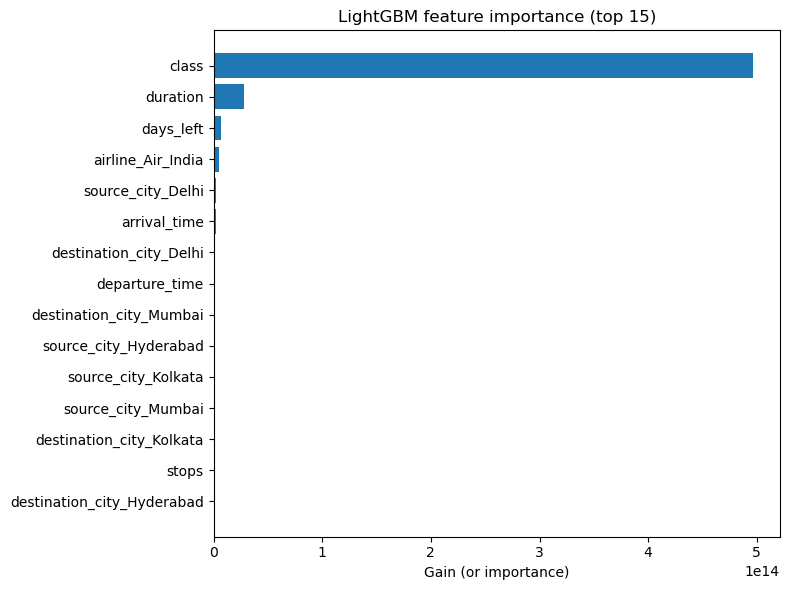

SHAP not available or failed. Using LightGBM built-in importance only.


In [176]:
# ---------------- Feature importance: LightGBM builtin + SHAP ----------------
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1) LightGBM builtin feature importance (gain-based if available)
# Replace `best_lgb` with your trained LightGBM model variable name if different.
lgb_model = best_lgb

# Feature names (if X_train is DataFrame; otherwise provide list)
feature_names = X_train.columns.tolist()

# Get importance (gain preferred; fallback to split)
try:
    # LightGBM scikit-learn API exposes feature_importances_ (by split)
    # and booster_.feature_importance('gain') for gain-based importance
    gains = lgb_model.booster_.feature_importance(importance_type='gain')
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'gain': gains
    }).sort_values('gain', ascending=False)
except Exception:
    # fallback
    importance_vals = lgb_model.feature_importances_
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importance_vals
    }).sort_values('importance', ascending=False)

# Show top 20
print("Top 20 features by LightGBM gain/importance:")
display(importance_df.head(20))

# Simple barplot top 15
plt.figure(figsize=(8,6))
cols = importance_df['feature'].head(15)[::-1]
vals = importance_df.iloc[:15, 1].values[::-1]
plt.barh(cols, vals)
plt.title("LightGBM feature importance (top 15)")
plt.xlabel("Gain (or importance)")
plt.tight_layout()
plt.show()

# 2) SHAP values (preferred interpretability) — try if shap is installed
# This will give per-sample and global explanations (summary plot).
try:
    import shap
    # create explainer for tree model
    explainer = shap.TreeExplainer(lgb_model)
    # compute shap values on a sample (not the whole test set to save time)
    sample = X_test.sample(n=5000, random_state=42) if len(X_test) > 5000 else X_test
    shap_values = explainer.shap_values(sample)  # for regressor this returns 1D array per feature

    # Summary plot (global importance + direction)
    shap.summary_plot(shap_values, sample, plot_type="bar", max_display=20, show=True)

    # Detailed beeswarm (slower) — uncomment if you want:
    # shap.summary_plot(shap_values, sample, max_display=20, show=True)

    # If you want top features numeric summary:
    mean_abs_shap = np.abs(shap_values).mean(axis=0)
    shap_df = pd.DataFrame({'feature': sample.columns, 'mean_abs_shap': mean_abs_shap}).sort_values('mean_abs_shap', ascending=False)
    print("Top 20 features by mean |SHAP|:")
    display(shap_df.head(20))

except Exception as e:
    print("SHAP not available or failed. Using LightGBM built-in importance only.")
    # If you want, pip install shap and rerun:
    # !pip install shap


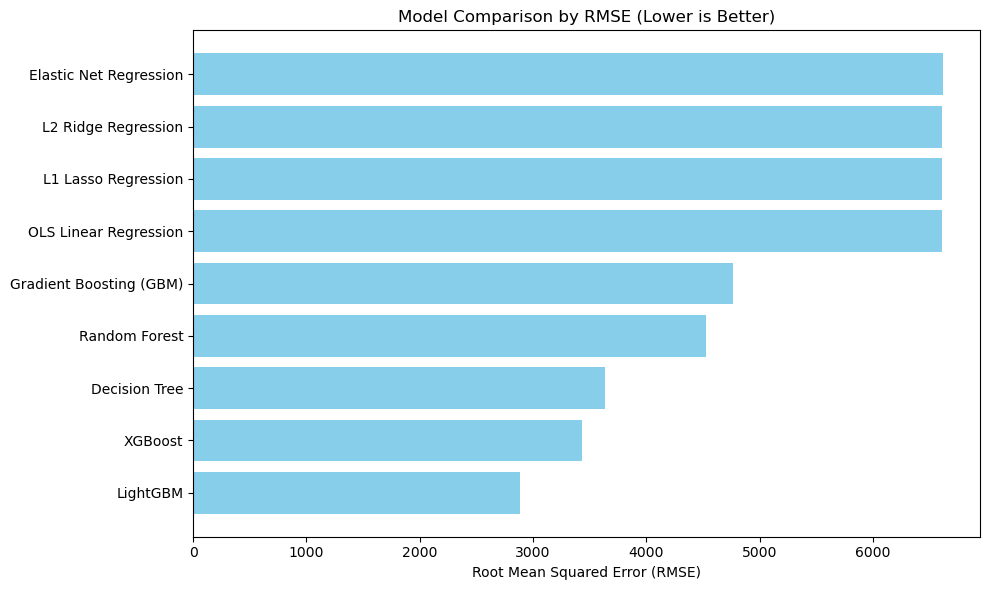

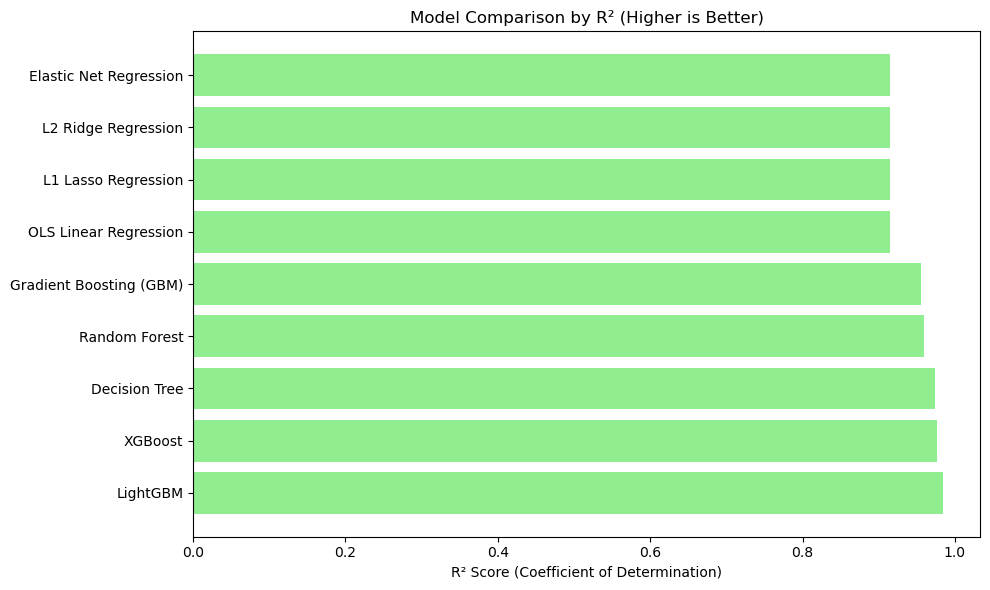

In [177]:
import matplotlib.pyplot as plt
import pandas as pd

# Model performance summary
data = {
    'Model': [
        'OLS Linear Regression',
        'L1 Lasso Regression',
        'L2 Ridge Regression',
        'Elastic Net Regression',
        'Decision Tree',
        'Random Forest',
        'Gradient Boosting (GBM)',
        'XGBoost',
        'LightGBM'
    ],
    'RMSE': [
        6609.684474161636,
        6609.6856080640755,
        6609.690493542608,
        6614.76340087205,
        3632.2038742537243,
        4525.86880349177,
        4766.254321624857,
        3429.617580954716,
        2886.484044041603
    ],
    'R²': [
        0.9148227478709184,
        0.9148227186463155,
        0.9148225927305131,
        0.914691796013076,
        0.9742781261602069,
        0.9600638596475548,
        0.9557088870643053,
        0.9770673859141069,
        0.983755719077153
    ]
}

# Create DataFrame
results_df = pd.DataFrame(data)

# Sort by RMSE (lower = better)
results_df_rmse = results_df.sort_values(by='RMSE', ascending=False)
# Sort by R² (higher = better)
results_df_r2 = results_df.sort_values(by='R²', ascending=True)

# --- Plot RMSE comparison ---
plt.figure(figsize=(10,6))
plt.barh(results_df_rmse['Model'], results_df_rmse['RMSE'], color='skyblue')
plt.xlabel('Root Mean Squared Error (RMSE)')
plt.title('Model Comparison by RMSE (Lower is Better)')
plt.gca().invert_yaxis()  # Highest performer on top
plt.tight_layout()
plt.show()

# --- Plot R² comparison ---
plt.figure(figsize=(10,6))
plt.barh(results_df_r2['Model'], results_df_r2['R²'], color='lightgreen')
plt.xlabel('R² Score (Coefficient of Determination)')
plt.title('Model Comparison by R² (Higher is Better)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


###  Final Model Conclusion — Flight Fare Prediction 

Tree-based models clearly outperformed linear ones due to strong **non-linear interactions** (e.g., airline × class, duration × stops) and many **categorical features**.  
Linear models (RMSE ≈ 6600, R² ≈ 0.91) failed to capture such thresholds, while **Decision Tree** (RMSE ≈ 3632, R² ≈ 0.97) learned them naturally.  
Ensemble methods further balanced bias and variance: **Random Forest** and **GBM** improved consistency, while **XGBoost** (RMSE ≈ 3430, R² ≈ 0.977) boosted precision.  
Finally, **LightGBM** achieved the best trade-off (RMSE ≈ **2886**, R² ≈ **0.984**) because its **leaf-wise growth**, **histogram optimization**, and **regularization** efficiently handled the large, categorical-rich dataset.  

**Conclusion:**  <br>
For this flight-fare prediction problem, tree-based boosting especially **LightGBM** — is the optimal choice, combining speed, scalability, and high predictive accuracy.
